In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/HR_comma_sep.csv")

In [ ]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

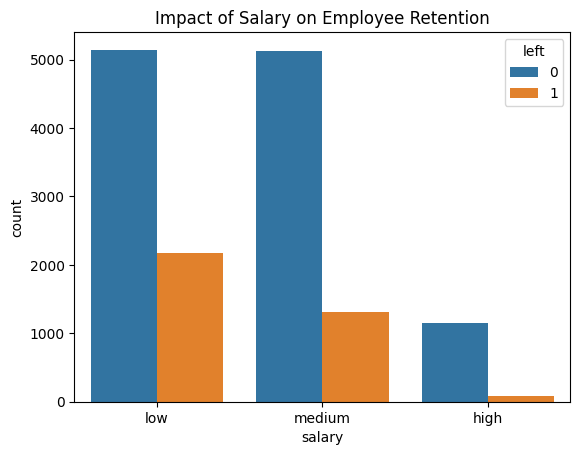

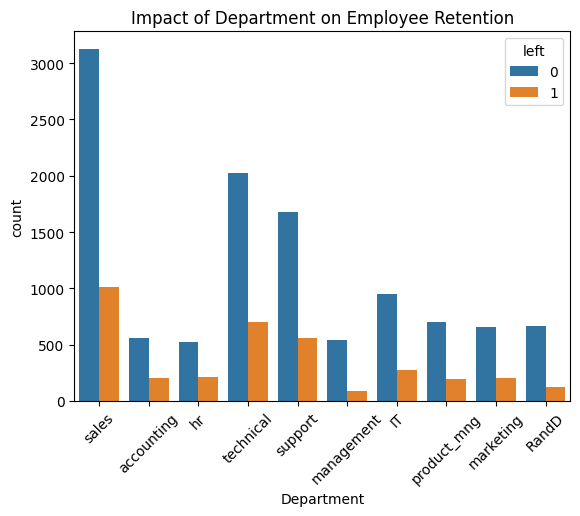

In [ ]:
sns.countplot(x='salary', hue='left', data=df)
plt.title("Impact of Salary on Employee Retention")
plt.show()

sns.countplot(x='Department', hue='left', data=df)
plt.xticks(rotation=45)
plt.title("Impact of Department on Employee Retention")
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)

X = df.drop(columns=['left'])
y = df['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.34      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



Decisison Tree

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
iris_df = pd.read_csv("/content/iris (1).csv")

X_iris = iris_df.drop(columns=['species'])
y_iris = iris_df['species']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

iris_model = DecisionTreeClassifier()
iris_model.fit(X_train_iris, y_train_iris)

y_pred_iris = iris_model.predict(X_test_iris)

# Accuracy and confusion matrix
print("Iris Dataset Results:")
print(f"Accuracy: {accuracy_score(y_test_iris, y_pred_iris):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_iris, y_pred_iris))
print("Classification Report:")
print(classification_report(y_test_iris, y_pred_iris))

Iris Dataset Results:
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
drug_df = pd.read_csv("/content/drug.csv")

label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    drug_df[col] = le.fit_transform(drug_df[col])
    label_encoders[col] = le

X_drug = drug_df.drop(columns=['Drug'])
y_drug = drug_df['Drug']

X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

drug_model = DecisionTreeClassifier()
drug_model.fit(X_train_drug, y_train_drug)

y_pred_drug = drug_model.predict(X_test_drug)

print("\nDrug Dataset Results:")
print(f"Accuracy: {accuracy_score(y_test_drug, y_pred_drug):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_drug, y_pred_drug))
print("Classification Report:")
print(classification_report(y_test_drug, y_pred_drug))


Drug Dataset Results:
Accuracy: 1.00
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


petrol_df = pd.read_csv("/content/petrol_consumption.csv")

X = petrol_df.drop(columns=['Petrol_Consumption'])
y = petrol_df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Regression Tree Results:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Regression Tree Results:
Mean Absolute Error: 90.60
Mean Squared Error: 16851.60
Root Mean Squared Error: 129.81
